<a href="https://colab.research.google.com/github/oviyajay/ML-Final-Project/blob/main/Eric_project_attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import keras
import os 
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from sklearn.datasets import load_files

In [2]:
!git clone https://github.com/oviyajay/ML-Final-Project

Cloning into 'ML-Final-Project'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 949 (delta 0), reused 0 (delta 0), pack-reused 946
Receiving objects: 100% (949/949), 109.13 MiB | 33.81 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [5]:
train_path = "/content/ML-Final-Project/maskdata/maskdata/train/"
os.listdir(train_path)

test_path = "/content/ML-Final-Project/maskdata/maskdata/test/"
os.listdir(test_path)

['with_mask', 'without_mask']

In [6]:
def load_data(path):
    data = load_files(path) #load all files from the path
    imgs = np.array(data['filenames']) #get the file  
    targets = np.array(data['target'])#get the the classification labels as integer index
    labels = np.array(data['target_names'])#get the the classification labels 
    return imgs,targets,labels

In [7]:
x_train, y_train,labels = load_data(train_path)
x_test, y_test,_ = load_data(test_path)

print('number of train images: ' , x_train.shape[0])
print('number of test images: ', x_test.shape[0])

number of train images:  616
number of test images:  198


In [8]:
num_classes = 2
resnet50_path = "/content/ML-Final-Project/ResNet-50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [9]:
MODEL = Sequential()
MODEL.add(ResNet50(include_top=False, pooling='avg', weights=resnet50_path))
MODEL.add(Dense(num_classes, activation='softmax'))

MODEL.layers[0].trainable = False

MODEL.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras_preprocessing.image import ImageDataGenerator
import numpy as np


image_size = 224
generator = ImageDataGenerator(preprocessing_function=preprocess_input,horizontal_flip=True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)


generator_train_data = generator.flow_from_directory(
        train_path,
        target_size=(image_size, image_size),
        batch_size=50,
        class_mode='categorical')

generator_validate_data = generator.flow_from_directory(test_path,target_size=(image_size, image_size),
        class_mode='categorical')

history=MODEL.fit_generator(
        generator_train_data,
        steps_per_epoch=4,epochs=3,
        validation_data=generator_validate_data,
        validation_steps=1)

Found 616 images belonging to 2 classes.
Found 198 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/3
4/4 [==============================] - 31s 8s/step - loss: 0.5084 - accuracy: 0.7550 - val_loss: 1.1056 - val_accuracy: 0.4375
Epoch 2/3
4/4 [==============================] - 29s 7s/step - loss: 0.1985 - accuracy: 0.9100 - val_loss: 0.1354 - val_accuracy: 0.9688
Epoch 3/3
4/4 [==============================] - 29s 7s/step - loss: 0.1079 - accuracy: 0.9850 - val_loss: 0.1223 - val_accuracy: 0.9688


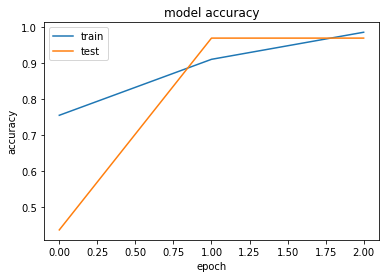

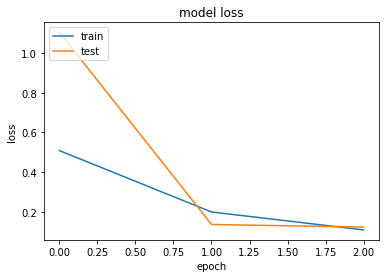

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
import pickle

pickle_out = open("resnet50_history.pickle","wb")
pickle.dump(history.history, pickle_out)
pickle_out.close()

In [13]:
pickle_in = open("resnet50_history.pickle","rb")
saved_history = pickle.load(pickle_in)
print(saved_history)

{'loss': [0.5084307193756104, 0.19853101670742035, 0.10791189223527908], 'accuracy': [0.7549999952316284, 0.9100000262260437, 0.9850000143051147], 'val_loss': [1.105634331703186, 0.1353895515203476, 0.12232695519924164], 'val_accuracy': [0.4375, 0.96875, 0.96875]}
